**done remotely on greenplanet**

In [1]:
import numpy
import gdal
import osr
import glob
import xarray
import datetime
import re
import cartopy
import cmocean
import matplotlib.pyplot as mp
import scipy.stats
import netCDF4

import dask

mp.rcParams.update({'mathtext.default': 'regular'})

open all files as a separate gdal dataset

* store ALL FILES in a list called ```file_list_datetime_all``` (for MOD11A2 size~27,000(
* store all yearday strings in a list called ```file_list_yearday_strings_all```

In [2]:
!ls DATA_nc/*LST_day*.nc

DATA_nc/MOD11A2_LST_day_2000.nc  DATA_nc/MOD11A2_LST_day_2010.nc
DATA_nc/MOD11A2_LST_day_2001.nc  DATA_nc/MOD11A2_LST_day_2011.nc
DATA_nc/MOD11A2_LST_day_2002.nc  DATA_nc/MOD11A2_LST_day_2012.nc
DATA_nc/MOD11A2_LST_day_2003.nc  DATA_nc/MOD11A2_LST_day_2013.nc
DATA_nc/MOD11A2_LST_day_2004.nc  DATA_nc/MOD11A2_LST_day_2014.nc
DATA_nc/MOD11A2_LST_day_2005.nc  DATA_nc/MOD11A2_LST_day_2015.nc
DATA_nc/MOD11A2_LST_day_2006.nc  DATA_nc/MOD11A2_LST_day_2016.nc
DATA_nc/MOD11A2_LST_day_2007.nc  DATA_nc/MOD11A2_LST_day_2017.nc
DATA_nc/MOD11A2_LST_day_2008.nc  DATA_nc/MOD11A2_LST_day_2018.nc
DATA_nc/MOD11A2_LST_day_2009.nc


In [3]:
#data_filenames = sorted(glob.glob('*DATA.npy'))
#datetime_filenames = sorted(glob.glob('*TIMES.npy'))

# for daytime lst

subset southwest part of Borneo using this syntax:

```
lst_day_subset = lst_day.isel(time=slice(10,11), lat=slice(750,1750), lon=slice(2200,3250))
```

In [129]:
data_mfds = xarray.open_mfdataset('DATA_nc/*LST_day*', chunks={'lat':100,'lon':100}, parallel=True, decode_times=False)
lst_day = data_mfds['LST_day']
lst_time = data_mfds['time']
lst_time_dayssince = lst_time.values

In [70]:
#lst_day_subset = lst_day.isel(time=slice(10,11), lat=slice(750,1750), lon=slice(2225,3225))
lst_day_borneo = lst_day.isel(lat=slice(750,1750), lon=slice(2225,3225))

In [75]:
lst_day_borneo_values = lst_day_borneo.values

In [86]:
mask = ~numpy.isnan(lst_day_borneo_values)

In [107]:
slope = numpy.zeros((lst_day_borneo_values.shape[1:3]))
intercept = numpy.zeros((lst_day_borneo_values.shape[1:3]))
rval = numpy.zeros((lst_day_borneo_values.shape[1:3]))
pval = numpy.zeros((lst_day_borneo_values.shape[1:3]))
stderr = numpy.zeros((lst_day_borneo_values.shape[1:3]))

for i in range(1000):
    for j in range(1000):
        try:
            slope[i,j], intercept[i,j], rval[i,j], pval[i,j], stderr[i,j] = \
            scipy.stats.linregress(lst_time_dayssince[mask[:,i,j]], lst_day_borneo_values[:,i,j][mask[:,i,j]])
        except:
            ValueError

* deg C per day * 365 days per year

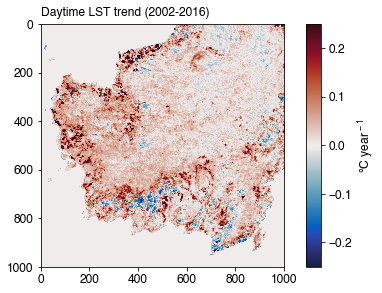

In [127]:
fontsize = 12
fig = mp.figure(figsize=(4.25,4))

ax = fig.add_subplot(111)
image = ax.imshow(slope*365.25, vmin=-0.25, vmax=0.25, cmap=cmocean.cm.balance)
ax.tick_params(labelsize=fontsize)

ax.text(s='Daytime LST trend (2002-2016)', x=0,y=1.02,
        fontsize=fontsize, ha='left', va='bottom', transform=ax.transAxes)

fig.tight_layout()

axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x1+0.05,axpos.y0,0.05,axpos.height])
cbar = mp.colorbar(image, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('$\degree$C year$^{\,-1}$', fontsize=fontsize)

mp.savefig('../figures/daytime_lst_trend_borneo.png', dpi=600, bbox_inches='tight', transparent=True)

# for nighttime lst

In [5]:
data_mfds = xarray.open_mfdataset('DATA_nc/*LST_night*', chunks={'lat':100,'lon':100}, parallel=True, decode_times=False)
lst_night = data_mfds['LST_night']
lst_time = data_mfds['time']
lst_time_dayssince = lst_time.values

In [6]:
#lst_day_subset = lst_day.isel(time=slice(10,11), lat=slice(750,1750), lon=slice(2225,3225))
lst_night_borneo = lst_night.isel(lat=slice(750,1750), lon=slice(2225,3225))

In [7]:
lst_night_borneo_values = lst_night_borneo.values

In [8]:
mask = ~numpy.isnan(lst_night_borneo_values)

In [9]:
slope = numpy.zeros((lst_night_borneo_values.shape[1:3]))
intercept = numpy.zeros((lst_night_borneo_values.shape[1:3]))
rval = numpy.zeros((lst_night_borneo_values.shape[1:3]))
pval = numpy.zeros((lst_night_borneo_values.shape[1:3]))
stderr = numpy.zeros((lst_night_borneo_values.shape[1:3]))

for i in range(1000):
    for j in range(1000):
        try:
            slope[i,j], intercept[i,j], rval[i,j], pval[i,j], stderr[i,j] = \
            scipy.stats.linregress(lst_time_dayssince[mask[:,i,j]], lst_night_borneo_values[:,i,j][mask[:,i,j]])
        except:
            ValueError

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:117: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/scipy/stats/_stats_mstats_common.py:119: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


* deg C per day * 365 days per year

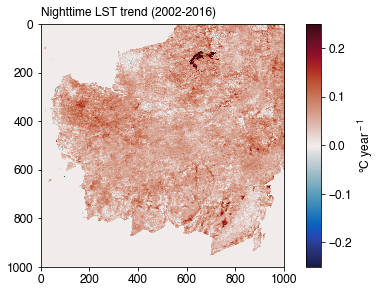

In [10]:
fontsize = 12
fig = mp.figure(figsize=(4.25,4))

ax = fig.add_subplot(111)
image = ax.imshow(slope*365.25, vmin=-0.25, vmax=0.25, cmap=cmocean.cm.balance)
ax.tick_params(labelsize=fontsize)

ax.text(s='Nighttime LST trend (2002-2016)', x=0,y=1.02,
        fontsize=fontsize, ha='left', va='bottom', transform=ax.transAxes)

fig.tight_layout()

axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x1+0.05,axpos.y0,0.05,axpos.height])
cbar = mp.colorbar(image, cax=cbar_ax)
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('$\degree$C year$^{\,-1}$', fontsize=fontsize)

mp.savefig('../figures/nighttime_lst_trend_borneo.png', dpi=600, bbox_inches='tight', transparent=True)

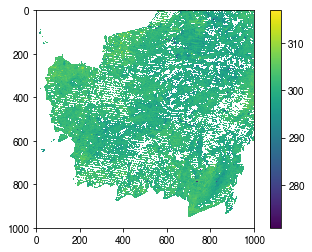

In [69]:
mp.imshow(lst_day_subset_values[0,:,:])
mp.colorbar()

In [16]:
lst_day_subset_timemean = lst_day_subset.mean(dim='time')

/export/home/blangenb/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/blangenb/miniconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


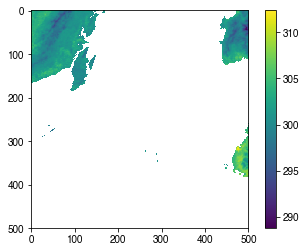

In [17]:
mp.imshow(lst_day_subset_timemean.values)
mp.colorbar()